# This notebook is meant to create functions for plotting 

Goal is then to add them to the classes or as checks that everything is well

In [1]:
%load_ext autoreload
%matplotlib inline

In [9]:
import os
import glob
import sys
import yaml

import numpy as np
import matplotlib.pyplot as plt


print(os.getcwd())

from tempest import casestudy
from tempest import grid
from tempest import joint_distrib
from tempest import handler

settings_path = 'settings/tropics.yaml'

/home/mcarenso/code/tempest


In [10]:
# Instantiate CaseStudy by passing the settings. 
# Should also create appropriate directories
hdlr = handler.Handler(settings_path)
cs = casestudy.CaseStudy(hdlr, verbose = True)
gr = grid.Grid(hdlr, verbose = False, overwrite = False)
# jd = joint_distrib.JointDistribution(gr)

if __name__ == '__main__':
    # print("Loaded Configuration:")
    # for key, value in settings.items():
    #     print(f"{key}: {value}")
    
    #gr.compute_funcs_for_var_id()
    pass

Data loaded from /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
Data saved as /homedata/mcarenso/tempest/DYAMOND_SAM_Tropics/var_id_days_i_t.json
LWNTA
day:      (#t)  t_i-t_f
16-08-01: (47) 1-47
16-08-02: (48) 48-95
16-08-03: (48) 96-143
16-08-04: (48) 144-191
16-08-05: (48) 192-239
16-08-06: (48) 240-287
16-08-07: (48) 288-335
16-08-08: (48) 336-383
16-08-09: (48) 384-431
16-08-10: (48) 432-479
16-08-11: (48) 480-527
16-08-12: (48) 528-575
16-08-13: (48) 576-623
16-08-14: (48) 624-671
16-08-15: (48) 672-719
16-08-16: (48) 720-767
16-08-17: (48) 768-815
16-08-18: (48) 816-863
16-08-19: (48) 864-911
16-08-20: (48) 912-959
16-08-21: (48) 960-1007
16-08-22: (48) 1008-1055
16-08-23: (48) 1056-1103
16-08-24: (48) 1104-1151
16-08-25: (48) 1152-1199
16-08-26: (48) 1200-1247
16-08-27: (48) 1248-1295
16-08-28: (48) 1296-1343
16-08-29: (48) 1344-1391
16-08-30: (48) 1392-1439
16-08-31: (48) 1440-1487
16-09-01: (48) 1488-1535
16-09-02: (48) 1536-1583
16-09-03: (48) 1584-1631


In [41]:
jd = joint_distrib.JointDistribution(gr, nd=5)

/home/mcarenso/.conda/envs/PyLMD/lib/python3.8/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


/home/mcarenso/.conda/envs/PyLMD/lib/python3.8/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

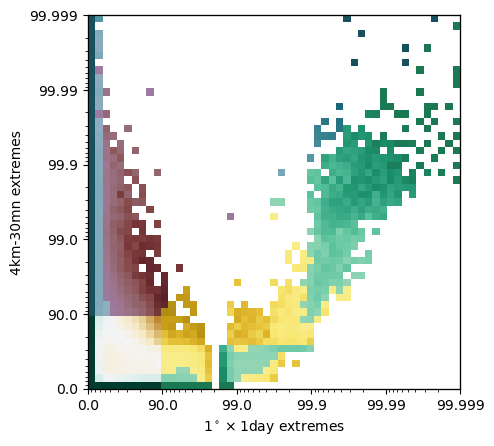

In [42]:
jd.plot(branch = 'True')

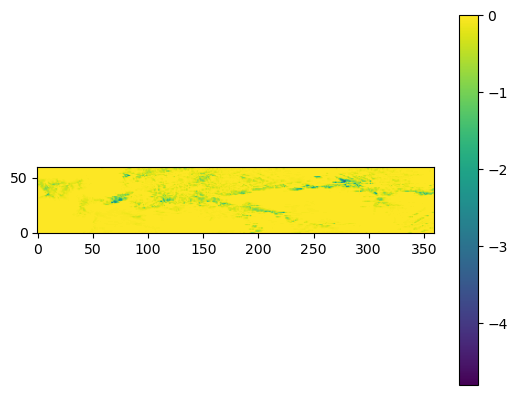

In [43]:
plt.imshow(jd.prec['mean_Prec'][:,:,25], origin = 'lower')
plt.colorbar()
## Bon on a un souci de signe avec mean_Prec... 

In [39]:
jd.get_mask_yxt_from_mask_jdist(jd.mask_branch1_90).shape

(60, 360, 41)

Convective only
figure size = 15 3.25
Mostly convective
figure size = 15 3.25
Mostly mesoscale
figure size = 15 3.25
Mesoscale only
figure size = 15 3.25


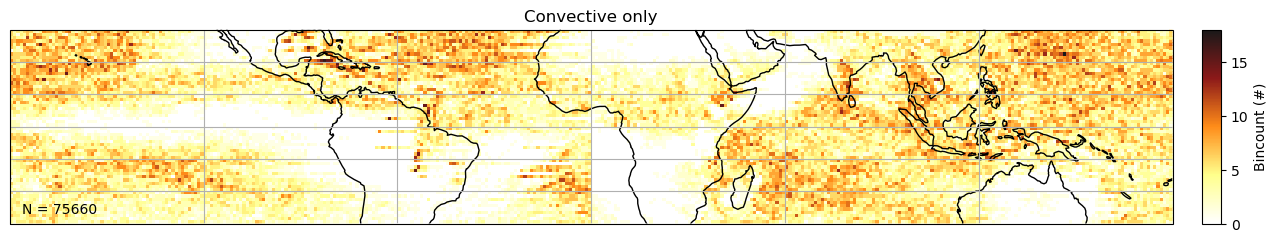

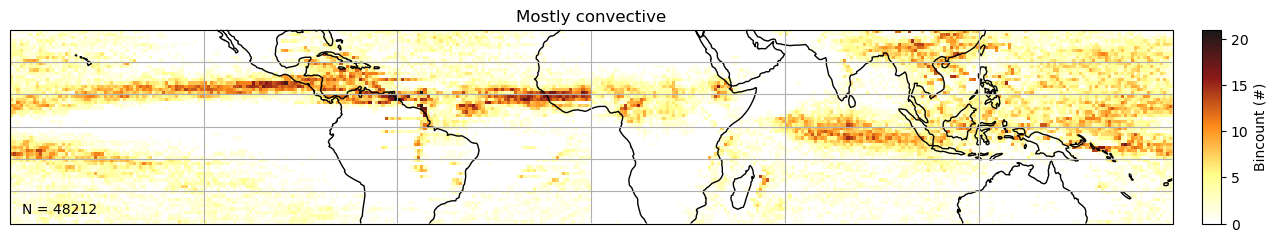

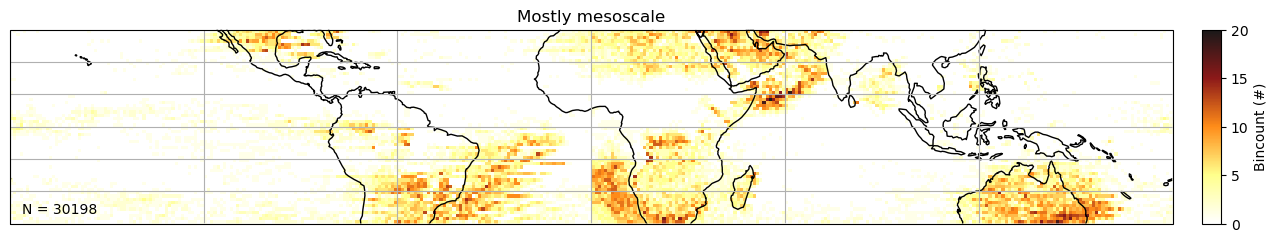

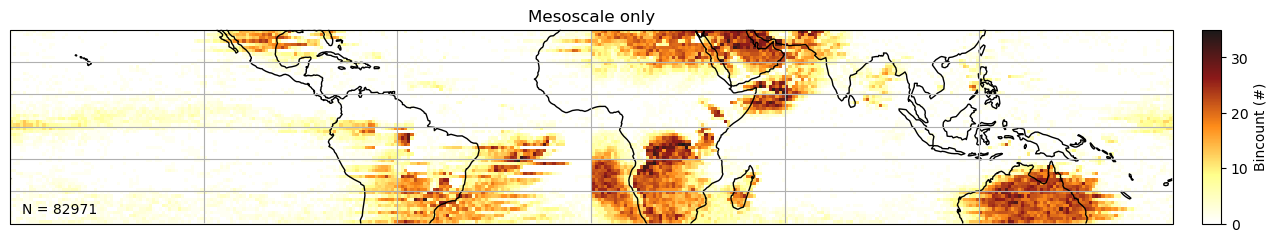

In [40]:
# Show frequency maps of extremes in the 4 regions (normalized by total bincount in mask?)
jd.make_mask()

mask_all = jd.mask_branch1_90, jd.mask_coloc_c_90, jd.mask_coloc_ac_90, jd.mask_branch2_90
mask_names = 'Convective only','Mostly convective','Mostly mesoscale','Mesoscale only'
mask_labels = 'conv','mostlyconv','mostlyacc','acc'

for mask,mask_name,mask_label in zip(mask_all,mask_names,mask_labels):
    
    print(mask_name)
    mask_yxt = jd.get_mask_yxt_from_mask_jdist(mask)
    ax = jd.make_map(mask_yxt)
    ax.set_title(mask_name)
    
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.pdf'%(mask_label)),bbox_inches='tight')
    # plt.savefig(os.path.join(figdir,'map_bincount_%s_extremes.png'%(mask_label)),bbox_inches='tight')